In [1]:
import pandas as pd
df=pd.read_csv("IRIS.csv")
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [2]:
df.info

<bound method DataFrame.info of      sepal_length  sepal_width  petal_length  petal_width         species
0             5.1          3.5           1.4          0.2     Iris-setosa
1             4.9          3.0           1.4          0.2     Iris-setosa
2             4.7          3.2           1.3          0.2     Iris-setosa
3             4.6          3.1           1.5          0.2     Iris-setosa
4             5.0          3.6           1.4          0.2     Iris-setosa
..            ...          ...           ...          ...             ...
145           6.7          3.0           5.2          2.3  Iris-virginica
146           6.3          2.5           5.0          1.9  Iris-virginica
147           6.5          3.0           5.2          2.0  Iris-virginica
148           6.2          3.4           5.4          2.3  Iris-virginica
149           5.9          3.0           5.1          1.8  Iris-virginica

[150 rows x 5 columns]>

In [3]:
df["species"].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [4]:
import numpy as np
df['Species_class']=np.where(df.species=='Iris-virginica',1,np.where(df.species=='Iris-versicolor',2,3))

In [5]:
print(df.shape)
cols=["sepal_length","sepal_width","petal_length","petal_width"]

(150, 6)


In [6]:
from sklearn.model_selection import train_test_split

train_X,test_X,train_y,test_y=train_test_split(df[cols],df["Species_class"],random_state=30,test_size=0.3)

In [7]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier, export_graphviz
param_grid = {'max_depth': np.arange(2, 8),'max_features': np.arange(2,5)}
tree = GridSearchCV(DecisionTreeClassifier(), param_grid, cv = 10,verbose=1,n_jobs=-1)
tree.fit( train_X, train_y )

Fitting 10 folds for each of 18 candidates, totalling 180 fits


GridSearchCV(cv=10, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'max_depth': array([2, 3, 4, 5, 6, 7]),
                         'max_features': array([2, 3, 4])},
             verbose=1)

In [8]:
tree.best_score_

0.9709090909090909

In [9]:
tree.best_params_

{'max_depth': 2, 'max_features': 4}

In [10]:
train_pred=tree.predict(train_X)
test_pred=tree.predict(test_X)

In [11]:
import sklearn.metrics as metrics
print(metrics.classification_report(test_y, test_pred))

              precision    recall  f1-score   support

           1       0.94      0.89      0.92        19
           2       0.86      0.92      0.89        13
           3       1.00      1.00      1.00        13

    accuracy                           0.93        45
   macro avg       0.93      0.94      0.94        45
weighted avg       0.94      0.93      0.93        45



In [12]:
DecTree = DecisionTreeClassifier( max_depth = 2, max_features=3)
DecTree.fit( train_X, train_y )

DecisionTreeClassifier(max_depth=2, max_features=3)

In [13]:
tree_test_pred = pd.DataFrame( { 'actual':  test_y,'predicted': DecTree.predict( test_X ) } )

In [14]:
tree_test_pred.sample(n=5)

,actual,predicted
128,1,1
68,2,2
127,1,1
133,1,2
8,3,3


In [15]:
metrics.accuracy_score(tree_test_pred.actual,tree_test_pred.predicted)

0.9333333333333333

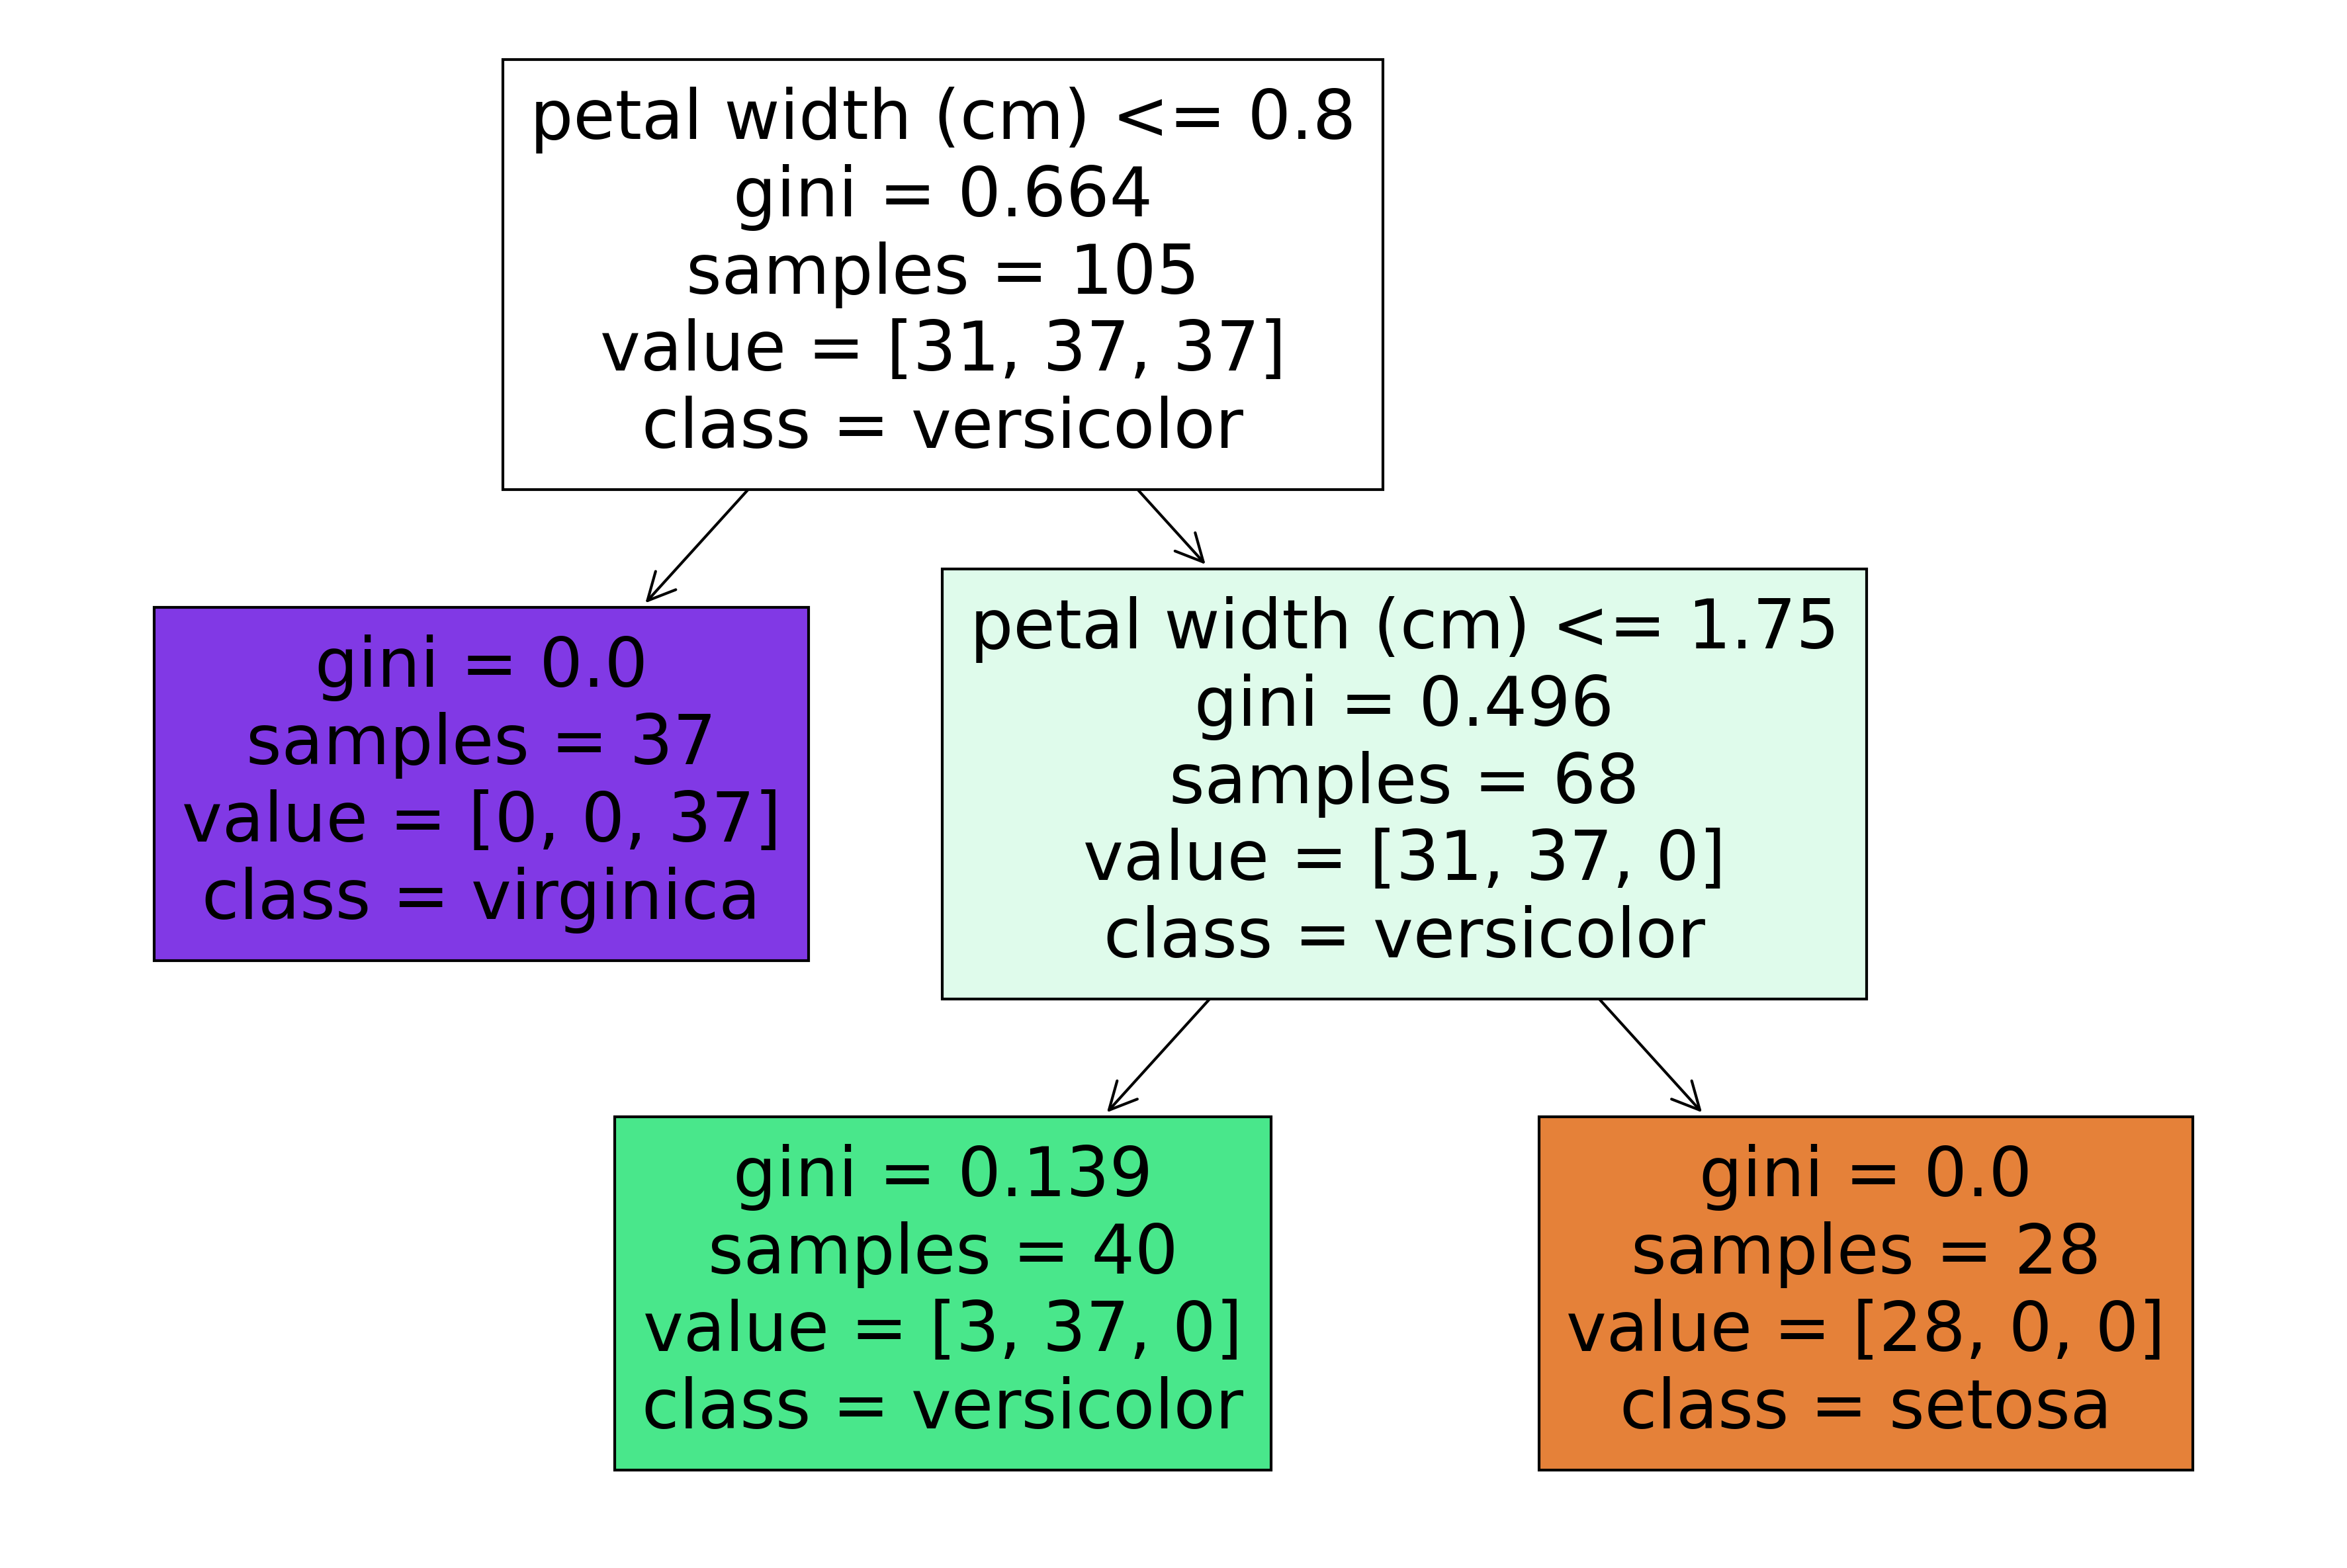

In [16]:
from sklearn import tree
import matplotlib.pyplot as plt
fn=['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)']
cn=['setosa', 'versicolor', 'virginica']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (15,10), dpi=300)
tree.plot_tree(DecTree,feature_names = fn, class_names=cn,filled = True)
fig.savefig('imagename.png')